This data set is from Kaggle: https://www.kaggle.com/. 
The data set contains the nutritional information for a variety of foods and this code will be used to analyse and extract informaton about the foods for specific nutritional requirements (conclusions can only be made on the foods that are contained in this dataset)

Import the data set:

In [384]:
import pandas as pd
nutrition= pd.read_csv('nutrition.csv')

Now to have quick look:

In [385]:
nutrition

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products
...,...,...,...,...,...,...,...,...,...,...
327,Fruit-flavored soda,12 oz.,346,161,0,0,0,0,42,"Drinks,Alcohol, Beverages"
328,Ginger ale,12 oz.,346,105,0,0,0,0,28,"Drinks,Alcohol, Beverages"
329,Root beer,12 oz.,346,140,0,0,0,0,35,"Drinks,Alcohol, Beverages"
330,Coffee,1 cup,230,3,t,0,0,0,1,"Drinks,Alcohol, Beverages"


The data set contains the nutritional information for 332 foods, and gives the number of calories, protein content, fiber content, fat content, saturated fat content and carbohydrate content for each, and then these are divided into food groups. 

The data set is not perfect and needs some tidying before we use it in the analysis. The "t" represents trace amounts but for the purpose of this analysis, this will be regarded as = 0.
There is also a t' so this will be changed too.



In [386]:
nutrition = nutrition.replace("t", 0)
nutrition = nutrition.replace("t'", 0)

Print the dataset again to check that this was successful:

In [387]:
nutrition

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products
...,...,...,...,...,...,...,...,...,...,...
327,Fruit-flavored soda,12 oz.,346,161,0,0,0,0,42,"Drinks,Alcohol, Beverages"
328,Ginger ale,12 oz.,346,105,0,0,0,0,28,"Drinks,Alcohol, Beverages"
329,Root beer,12 oz.,346,140,0,0,0,0,35,"Drinks,Alcohol, Beverages"
330,Coffee,1 cup,230,3,0,0,0,0,1,"Drinks,Alcohol, Beverages"


All values that had "t" or "t'" are now 0

The next step is to remove all commas, negative values and letters from the data, and also to convert variables to int or float varibles:

In [388]:
nutrition = nutrition.replace(",","", regex=True)


In [389]:
nutrition['Protein'] = nutrition['Protein'].replace("-1","", regex=True)

In [390]:
nutrition['Fiber'] = nutrition['Fiber'].replace("a","", regex=True)

In [391]:
nutrition['Calories']=(8+44)/2

Check data types:

In [392]:
nutrition.dtypes

Food         object
Measure      object
Grams        object
Calories    float64
Protein      object
Fat          object
Sat.Fat      object
Fiber        object
Carbs        object
Category     object
dtype: object

Now to change all following datatypes to numeric:

In [393]:
nutrition['Grams']=pd.to_numeric(nutrition['Grams'])
nutrition['Calories']=pd.to_numeric(nutrition['Calories'])
nutrition['Protein']=pd.to_numeric(nutrition['Protein'])
nutrition['Fat']=pd.to_numeric(nutrition['Fat'])
nutrition['Sat.Fat']=pd.to_numeric(nutrition['Sat.Fat'])
nutrition['Fiber']=pd.to_numeric(nutrition['Fiber'])
nutrition['Carbs']=pd.to_numeric(nutrition['Carbs'])

Check dataypes to check successful:

In [394]:
nutrition.dtypes

Food         object
Measure      object
Grams         int64
Calories    float64
Protein     float64
Fat           int64
Sat.Fat     float64
Fiber       float64
Carbs       float64
Category     object
dtype: object

Correct dataypes, some are decimal (float) and others are intergers (int). Next is checking for any null values in the data before analysing:

In [421]:
print(nutrition.isnull().any())
print('-'*245)
print(nutrition.describe())
print('-'*245)

Food        False
Measure     False
Grams       False
Calories    False
Protein     False
Fat         False
Sat.Fat     False
Fiber       False
Carbs       False
Category    False
dtype: bool
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
             Grams    Calories     Protein         Fat     Sat.Fat  \
count   328.000000  328.000000  328.000000  328.000000  328.000000   
mean    143.756098    0.377965    0.070561    0.099610    0.065554   
std     139.846929    0.411526    0.089874    0.190068    0.131521   
min      11.000000    0.018323    0.000000    0.000000    0.000000   
25%      59.250000    0.130000    0.005371    0.000000    0.000000   
50%     108.000000    0.240741    0.030000    0.010000    0.000000   
75%     200.000000    0.439035    0.100391    0.105882    0.073776   
ma

There is a null value in this row so we shall drop it for this analysis:

In [422]:
nutrition=nutrition.dropna()
nutrition.shape

(328, 10)

Now to change the category names and reduce the number of categories for easier visulaistion:

In [397]:
nutrition['Category'] = nutrition['Category'].replace('DrinksAlcohol Beverages', 'Drinks, Alcohol, and Beverages', regex=True)
nutrition['Category'] = nutrition['Category'].replace('Fats Oils Shortenings', 'Fats, Oils, and Shortenings', regex=True)
nutrition['Category'] = nutrition['Category'].replace('Fish Seafood', 'Fish and Seafood', regex=True)
nutrition['Category'] = nutrition['Category'].replace('Meat Poultry', 'Meat and Poultry', regex=True)
nutrition['Category'] = nutrition['Category'].replace(['Breads cereals fastfoodgrains', 'Seeds and Nuts'], 'Grains', regex=True)
nutrition['Category'] = nutrition['Category'].replace(['Desserts sweets', 'Jams Jellies'], 'Desserts', regex=True)
nutrition['Category'] = nutrition['Category'].replace(['Fruits A-F', 'Fruits G-P', 'Fruits R-Z'], 'Fruits', regex=True)
nutrition['Category'] = nutrition['Category'].replace(['Vegetables A-E', 'Vegetables F-P', 'Vegetables R-Z'], 'Vegetables', regex=True)

In [398]:
nutrition

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,26.0,32.0,40,36.0,0.0,48.0,Dairy products
1,Milk skim,1 qt.,984,26.0,36.0,0,0.0,0.0,52.0,Dairy products
2,Buttermilk,1 cup,246,26.0,9.0,5,4.0,0.0,13.0,Dairy products
3,Evaporated undiluted,1 cup,252,26.0,16.0,20,18.0,0.0,24.0,Dairy products
4,Fortified milk,6 cups,1419,26.0,89.0,42,23.0,1.4,119.0,Dairy products
...,...,...,...,...,...,...,...,...,...,...
327,Fruit-flavored soda,12 oz.,346,26.0,0.0,0,0.0,0.0,42.0,"Drinks, Alcohol, and Beverages"
328,Ginger ale,12 oz.,346,26.0,0.0,0,0.0,0.0,28.0,"Drinks, Alcohol, and Beverages"
329,Root beer,12 oz.,346,26.0,0.0,0,0.0,0.0,35.0,"Drinks, Alcohol, and Beverages"
330,Coffee,1 cup,230,26.0,0.0,0,0.0,0.0,1.0,"Drinks, Alcohol, and Beverages"


Before visualisation, we need to make sure that all readings are converted to amount per gram:

In [399]:
nutrition['Calories'] = nutrition['Calories'] / nutrition['Grams']
nutrition['Protein'] = nutrition['Protein'] / nutrition['Grams']
nutrition['Fat'] = nutrition['Fat'] / nutrition['Grams']
nutrition['Sat.Fat'] = nutrition['Sat.Fat'] / nutrition['Grams']
nutrition['Fiber'] = nutrition['Fiber'] / nutrition['Grams']
nutrition['Carbs'] = nutrition['Carbs'] / nutrition['Grams']

In [400]:
nutrition

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,0.026639,0.032787,0.040984,0.036885,0.000000,0.049180,Dairy products
1,Milk skim,1 qt.,984,0.026423,0.036585,0.000000,0.000000,0.000000,0.052846,Dairy products
2,Buttermilk,1 cup,246,0.105691,0.036585,0.020325,0.016260,0.000000,0.052846,Dairy products
3,Evaporated undiluted,1 cup,252,0.103175,0.063492,0.079365,0.071429,0.000000,0.095238,Dairy products
4,Fortified milk,6 cups,1419,0.018323,0.062720,0.029598,0.016209,0.000987,0.083862,Dairy products
...,...,...,...,...,...,...,...,...,...,...
327,Fruit-flavored soda,12 oz.,346,0.075145,0.000000,0.000000,0.000000,0.000000,0.121387,"Drinks, Alcohol, and Beverages"
328,Ginger ale,12 oz.,346,0.075145,0.000000,0.000000,0.000000,0.000000,0.080925,"Drinks, Alcohol, and Beverages"
329,Root beer,12 oz.,346,0.075145,0.000000,0.000000,0.000000,0.000000,0.101156,"Drinks, Alcohol, and Beverages"
330,Coffee,1 cup,230,0.113043,0.000000,0.000000,0.000000,0.000000,0.004348,"Drinks, Alcohol, and Beverages"


**Data Visualisation and Analysis**

Import libraries that are needed for data visualisation:

In [401]:
import matplotlib as plt
import seaborn as sns


Now to look for common desires in food. First, let us look at the foods that have the higest fibre content, using a bar chart:
    

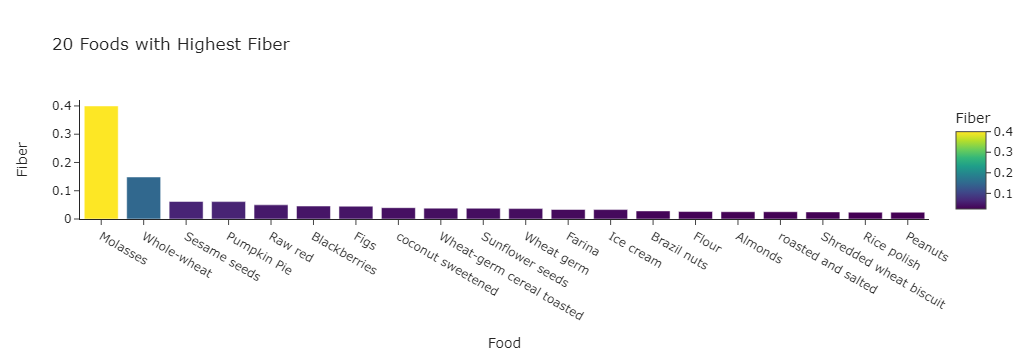

In [424]:
fiber = nutrition.sort_values(by='Fiber', ascending= False)
top_20_fiber = fiber.head(20)
fig = px.bar(top_20_fiber, x='Food', y='Fiber', color='Fiber', title=' 20 Foods with Highest Fiber', template = 'simple_white')
fig.show()

Now to do the same but for protien:

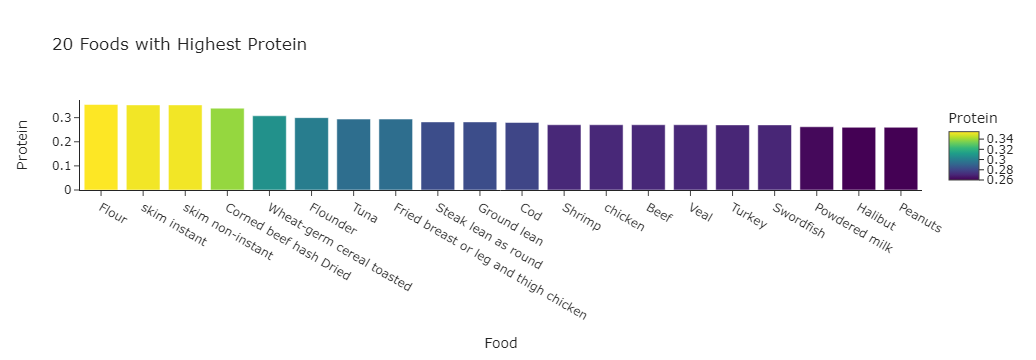

In [425]:
protein = nutrition.sort_values(by='Protein', ascending= False)
top_20_protein = protein.head(20)
fig = px.bar(top_20_protein, x='Food', y='Protein', color='Protein', title=' 20 Foods with Highest Protein', template = 'simple_white')
fig.show()

Now for Carbohydrates:

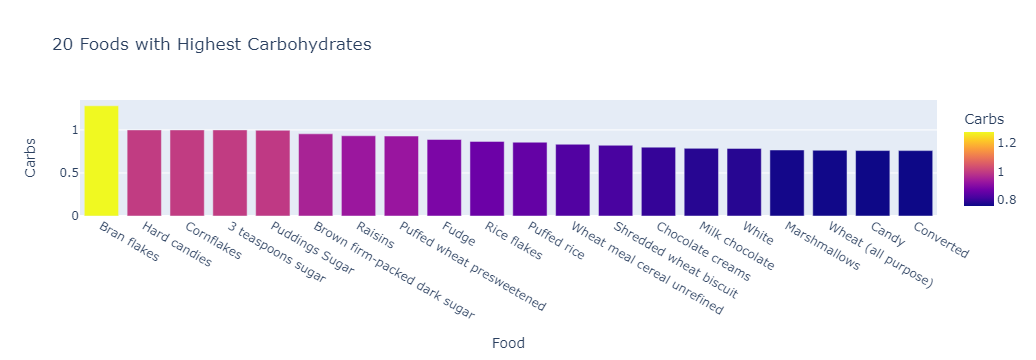

In [436]:
carbs = nutrition.sort_values(by='Carbs', ascending= False)
top_20_carbs = carbs.head(20)
fig = px.bar(top_20_carbs, x='Food', y='Carbs', color='Carbs', title=' 20 Foods with Highest Carbohydrates', template = 'plotly')
fig.show()

Now for Fat:

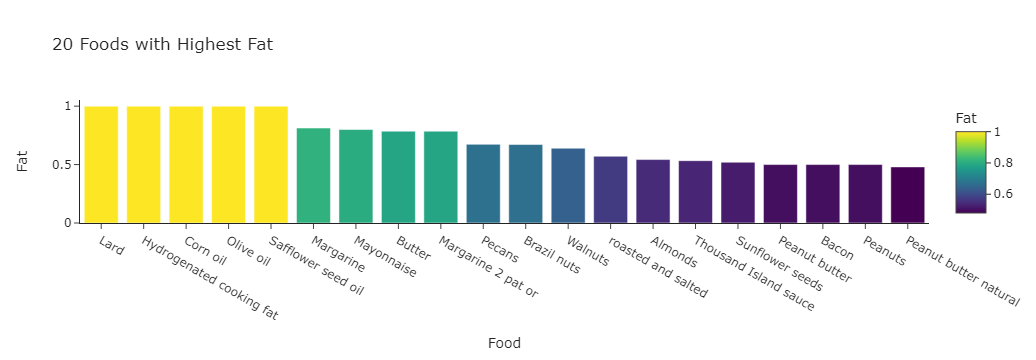

In [426]:
fat = nutrition.sort_values(by='Fat', ascending= False)
top_20_fat = fat.head(20)
fig = px.bar(top_20_fat, x='Food', y='Fat', color='Fat', title=' 20 Foods with Highest Fat', template = 'simple_white')
fig.show()

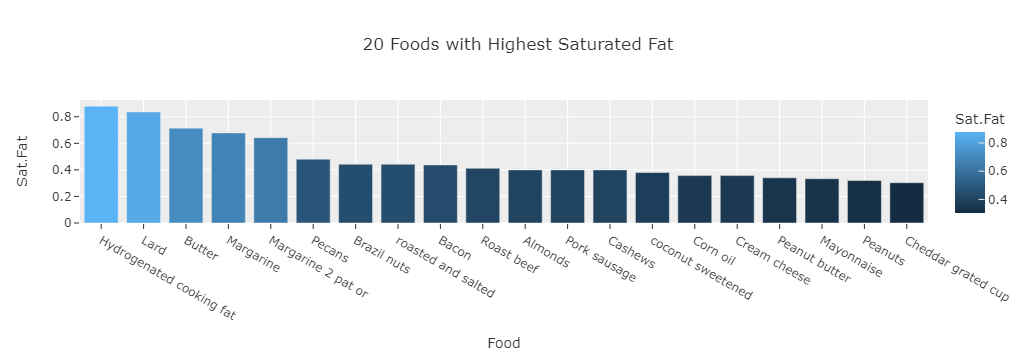

In [439]:
fat = nutrition.sort_values(by='Sat.Fat', ascending= False)
top_20_fat = fat.head(20)
fig = px.bar(top_20_fat, x='Food', y='Sat.Fat', color='Sat.Fat', title=' 20 Foods with Highest Saturated Fat', template = 'ggplot2')
fig.show()

This information is helpful but we may want to know about whole food groups overall:

It may be more helpful to know about whole food groups, and this  information can displayed in the form of a pie chart:

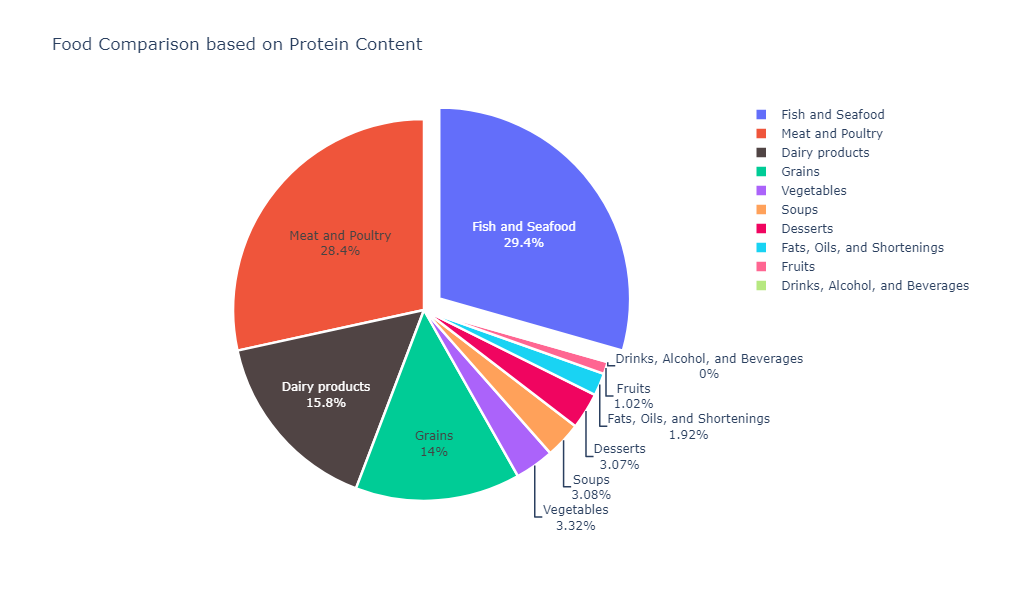

In [429]:
category_dist = nutrition.groupby(['Category']).mean()
category_dist
fig = go.Figure(go.Pie(values=category_dist['Protein'].values, text=category_dist.index, labels=category_dist.index,pull=[0,0,0,0,0.1,0,0,0,0,0],
                marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))))
fig.update_layout(title_text="Food Comparison based on Protein Content",height=600, width=800)
fig.show()

Results show that **Fish and Seafood** have the highest, **Meat and Poultry** have the second highest content, and **Dairy Products** are third highest for protein content.

Now to look at fiber content in this format:

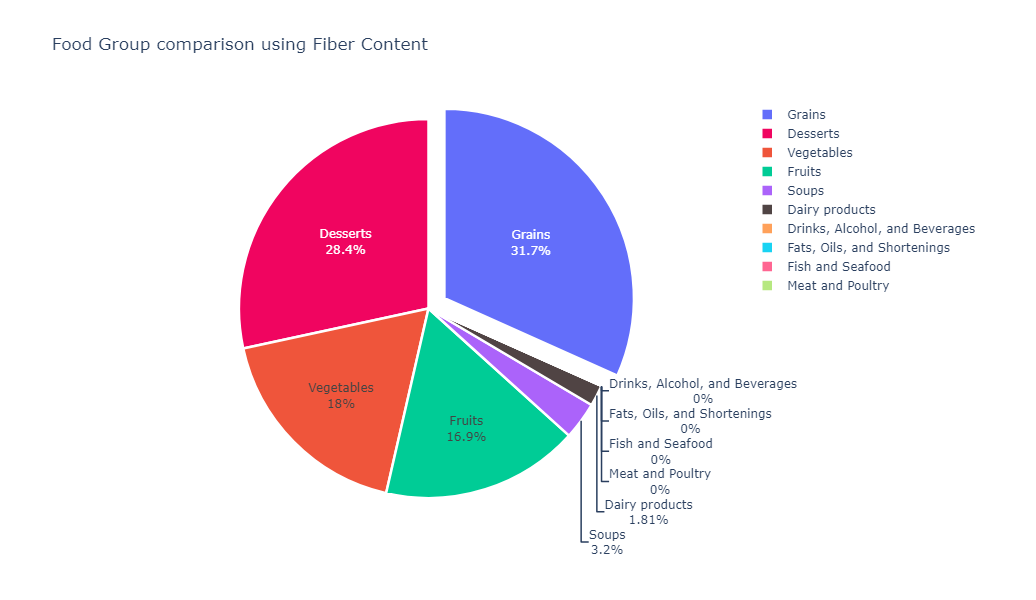

In [430]:
category_dist = nutrition.groupby(['Category']).mean()
category_dist
fig = go.Figure(go.Pie(values=category_dist['Fiber'].values, text=category_dist.index, labels=category_dist.index,pull=[0,0,0,0,0,0,0.1,0,0,0],
                marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))))
fig.update_layout(title_text="Food Group comparison using Fiber Content",height=600, width=800)
fig.show()

**Grains** have the highest fiber content 

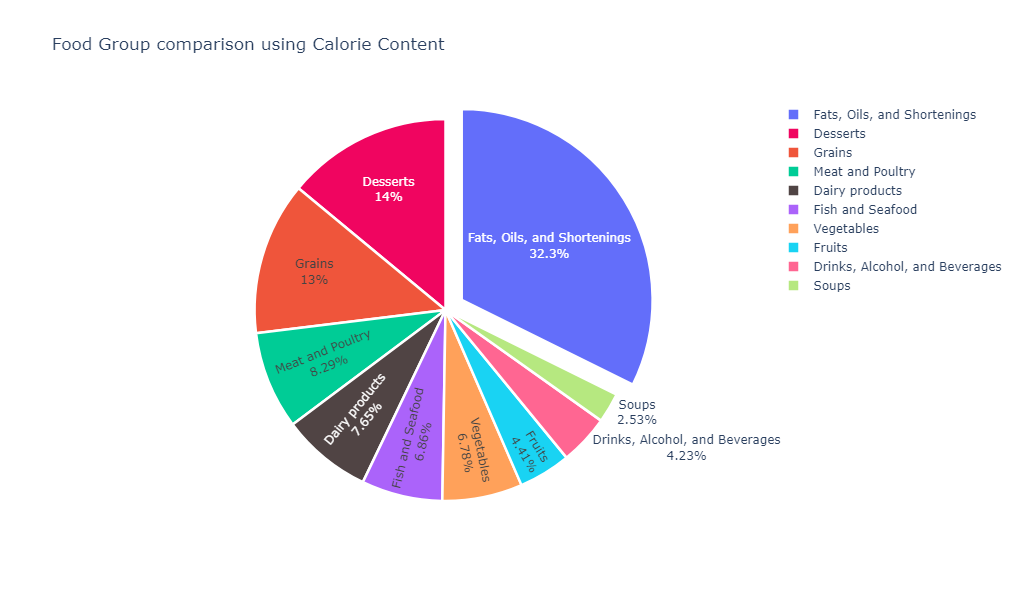

In [420]:
category_dist = nutrition.groupby(['Category']).mean()
category_dist
fig = go.Figure(go.Pie(values=category_dist['Calories'].values, text=category_dist.index, labels=category_dist.index, pull=[0,0,0.,0.1,0,0,0,0,0,0],
                marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))))
fig.update_layout(title_text="Food Group comparison using Calorie Content",height=600, width=800)
fig.show()

**Fats, Oils, and Shortenings** have the highest calorie content, followed by **desserts** and **grains**. 